In [1]:
import timeit
import psutil
import sys
import os
import matplotlib.pyplot as plt

from multiprocessing import cpu_count
from concurrent.futures import ProcessPoolExecutor as Pool

In [2]:
def measure_runtime(func, params, array):
    start_time = timeit.default_timer()
    func(array, **params)
    end_time = timeit.default_timer()
    runtime = end_time - start_time
    return runtime

In [3]:
def run_tests_float(sort_functions, funcs_params, input_sizes, input_range,
                    executor=Pool):
    data = {label: [] for _, label in sort_functions}
    with executor(max_workers=cpu_count()) as pool:
        for sort_func, label in sort_functions:
            for size in input_sizes:
                array = random_1_dim_array(
                    elts_range=input_range, size_of_1_dim_range=size)
                data[label].append(pool.submit(
                    measure_runtime, sort_func,
                    funcs_params[label],
                    array))
        for sort_func, label in sort_functions:
            for i in range(len(data[label])):
                data[label][i] = data[label][i].result()
    return data

In [19]:
def plot_results(data_to_plot):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    for label in data_to_plot:
        ax1.plot([i[0] for i in input_sizes], [sum(runtime)/len(runtime) \
                        for runtime in data_to_plot[label]], marker='o', label=f'{label} (Runtime)')

    ax1.set_xlabel('Input Size')
    ax1.set_ylabel('Runtime (seconds)')
    fig.legend(loc='upper right')
    plt.grid(True)
    plt.title('Sorting Algorithms\' Runtimes')
    plt.show()

def plot_results_log(data_to_plot):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    for label in data_to_plot:
        ax1.plot([i[0] for i in input_sizes], [sum(runtime)/len(runtime) \
                        for runtime in data_to_plot[label]], marker='o', label=f'{label} (Runtime)')

    ax1.set_xlabel('Input Size')
    ax1.set_ylabel('Runtime (seconds)')
    ax1.set_xscale('log')
    fig.legend(loc='upper right')
    plt.grid(True)
    plt.title('Sorting Algorithms\' Runtimes')
    plt.show()

In [5]:
os.chdir('../../../')
sys.path.append(os.getcwd())
from Algorithms_Python.merge_sort import merge_sort, merge_sort_parallel
from Algorithms_Python.tests.test_sorts_and_searches import random_1_dim_array

In [6]:
input_sizes = [(1, 1), (10, 10), (100, 100), (1000, 1000), (10000, 10000), 
               (100000, 100000), (1000000, 1000000)]

sorting_algorithms = [
    (merge_sort, 'Merge Sort 10'),
    (merge_sort, 'Merge Sort 15'),
    (merge_sort, 'Merge Sort 20'),
    (merge_sort, 'Merge Sort 50'),
]

funcs_params = {
    'Merge Sort 10': {'batch_size': 10},
    'Merge Sort 15': {'batch_size': 15},
    'Merge Sort 20': {'batch_size': 20},
    'Merge Sort 50': {'batch_size': 50}
}

input_range = (-100, 100)

In [7]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_float(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

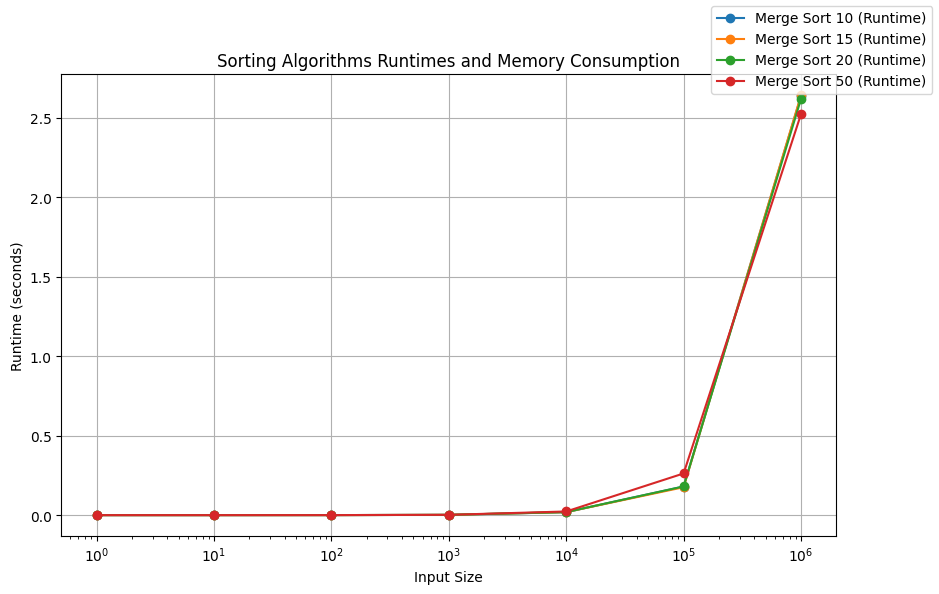

In [8]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results_log(data_to_plot)

In [9]:
input_sizes = [(1, 1), (10, 10), (100, 100), (1000, 1000), 
               (10000, 10000), (100000, 100000), (1000000, 1000000)]

sorting_algorithms = [
    (merge_sort_parallel, 'Merge Sort Parallel 500'),
    (merge_sort_parallel, 'Merge Sort Parallel 1000'),
    (merge_sort_parallel, 'Merge Sort Parallel 5000')
]

funcs_params = {
    'Merge Sort Parallel 500': {'batch_size': 500},
    'Merge Sort Parallel 1000': {'batch_size': 1000},
    'Merge Sort Parallel 5000': {'batch_size': 5000}
}

In [10]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_float(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

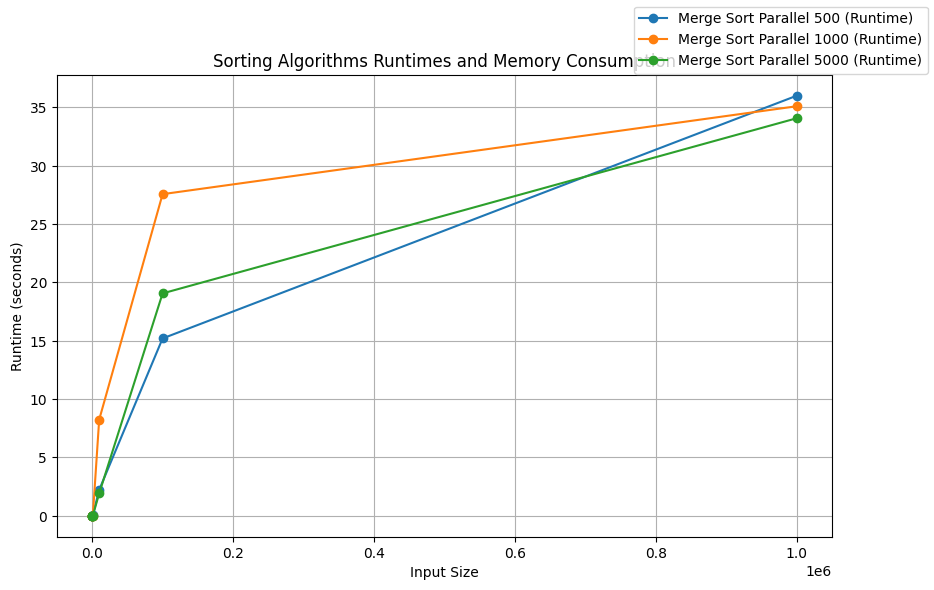

In [13]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results(data_to_plot)

In [14]:
sorting_algorithms = [
    (merge_sort, 'Merge Sort'),
    (merge_sort_parallel, 'Merge Sort Parallel')
]

funcs_params = {
    'Merge Sort': {},
    'Merge Sort Parallel': {}
}

In [15]:
full_data = []
for _ in range(10):
    one_test_data = run_tests_float(sorting_algorithms, funcs_params, input_sizes, input_range)
    full_data.append(one_test_data)

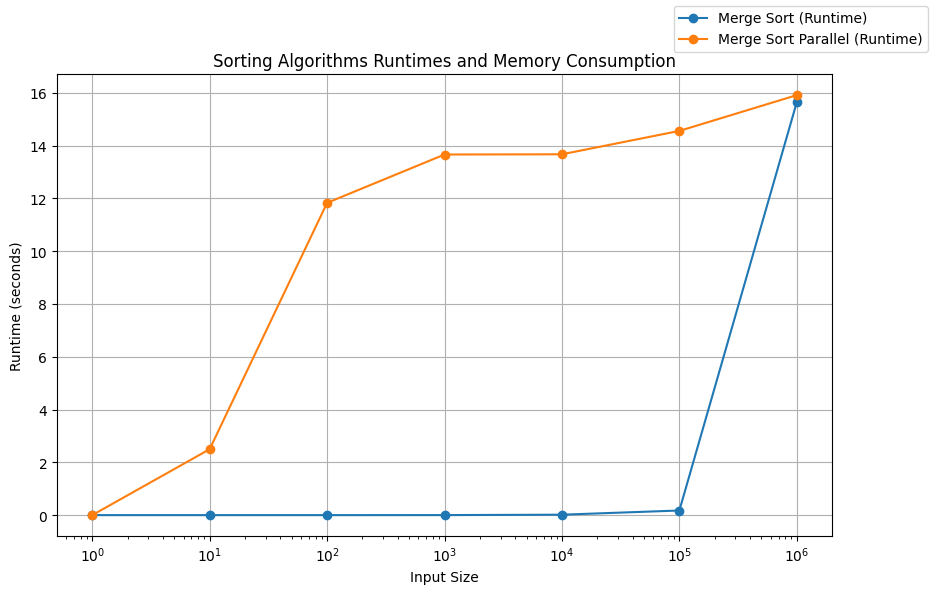

In [18]:
data_to_plot = {label: [[full_data[i][label][j] for i in range(10)] for j in range(len(input_sizes))] for _, label in sorting_algorithms}
plot_results_log(data_to_plot)

While for merge sort there is almost no effect for batch size changing because insertion sort does not give overwhelming benefit compared to merge sort, we can see that parallelization brings a decrease in performance, which is most likely due to the recursion overhead and the python handles multiprocessing itself.